Number of arguments: 9 arguments.
Argument List: ['GCC2_fun.GCC2' 'dataset' '-1' '4' '1e-05' '1' '2' '100' '1'] 

Data file: dataset
Output file: dataset_output.pdf 

>>>>>>Start Time(VR computation): 2021-06-12 13:53:20
Base coefficient field: Z/23Z
Maximal scale: 4.0
Persistence threshold for selecting significant cocyles: -1.0
>>>>>>End Time (VR-computation): 2021-06-12 13:54:12


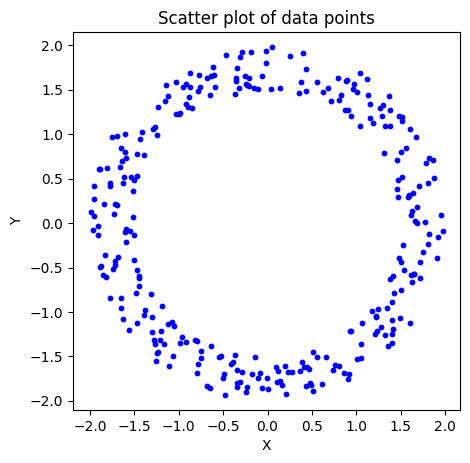

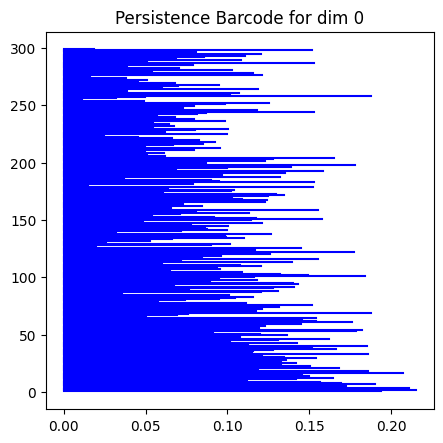

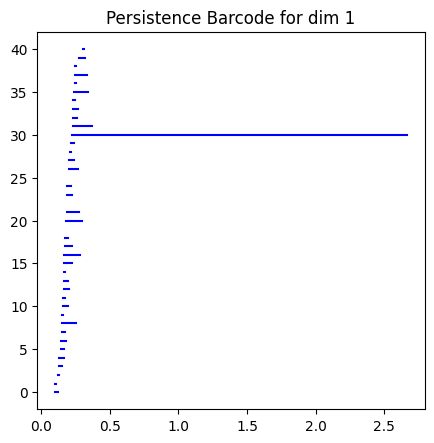

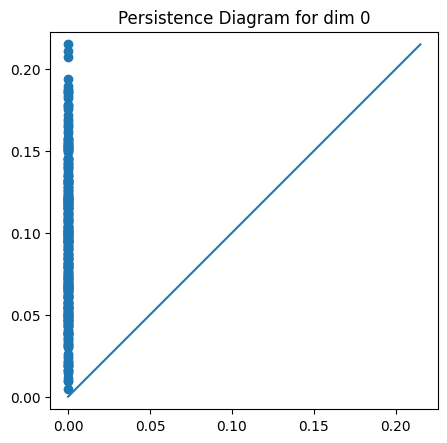

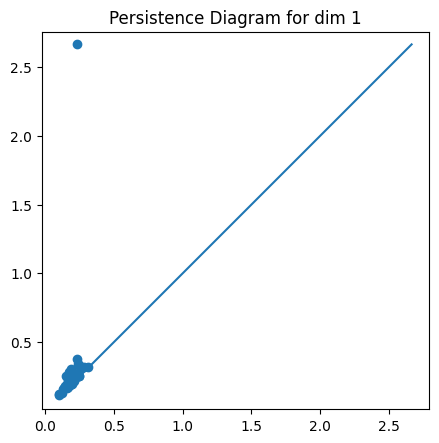


>>>>>>Threshold overridden, the 1-cocyles with the  1  largest persistence would be selected for computation.
>>>>>>Selected significant features:
(0.227016,2.66595) 	persistence =  2.438936099410057


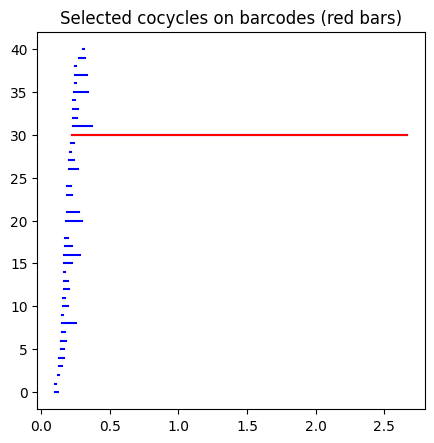

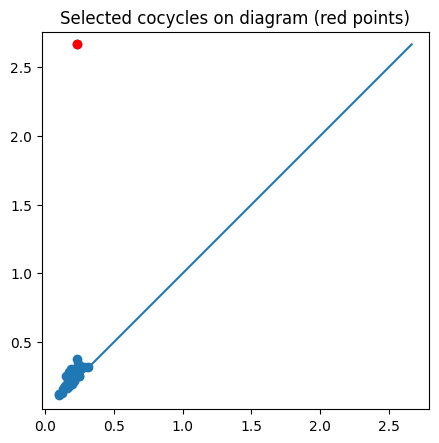

<Figure size 500x500 with 0 Axes>


Constant edges, with coordinates difference < 1e-05
Optimizer maximal iteration steps= 100
>>>>>> Start Time (GCC computation): 2021-06-12 13:54:13
>>>>>> lambda =  1.0 . => Analysis of Circular coordinates 
 (mod 23 - 0.0*L1 + 1.0*L2)


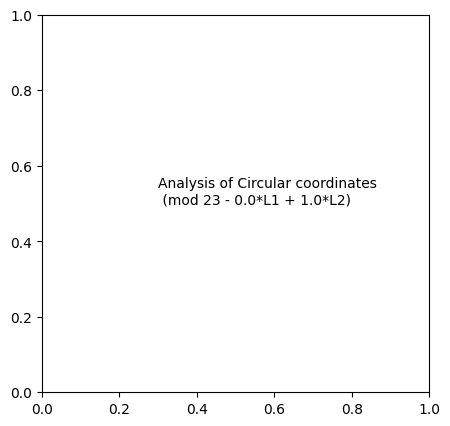

Penalty function =>0.0*L^1+1.0*L^2
Before optim cost: 25.639864972223595
After  optim cost: 25.63986497226738  in  100  steps


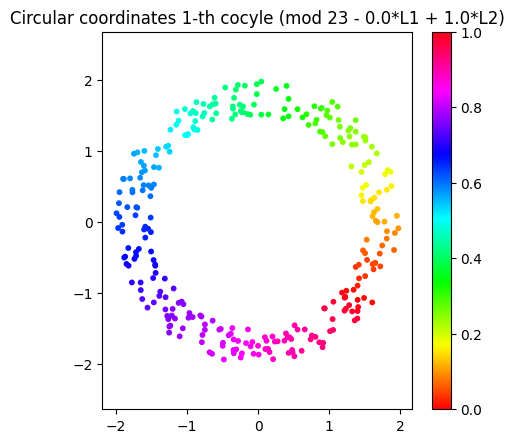

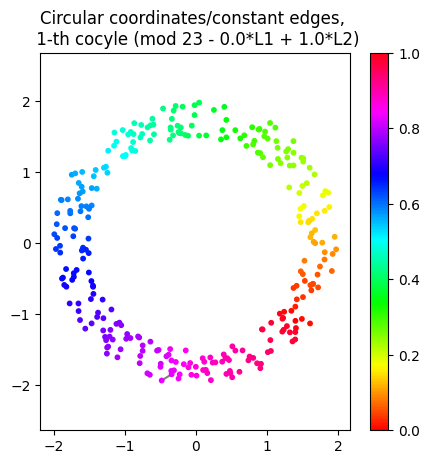

Penalty function =>0.0*L^1+1.0*L^2 Coordinates=>dataset_CircularCoordinates_1.0_0.txt


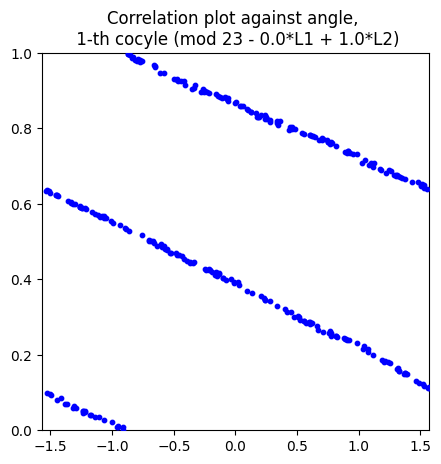

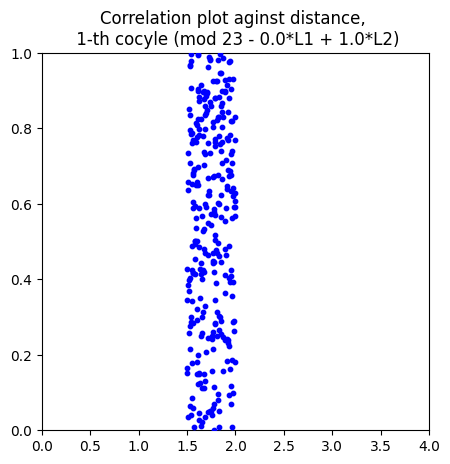

Penalty function =>0.0*L^1+1.0*L^2 Embeddings=>dataset_Embedding_1.0.txt


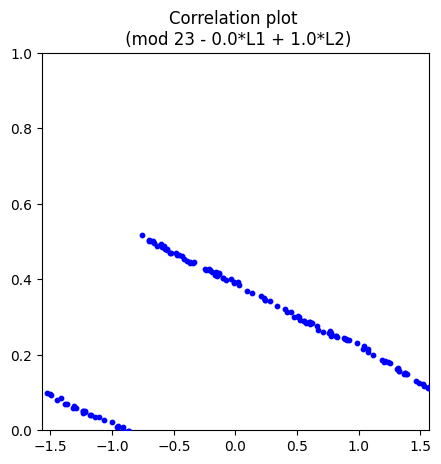

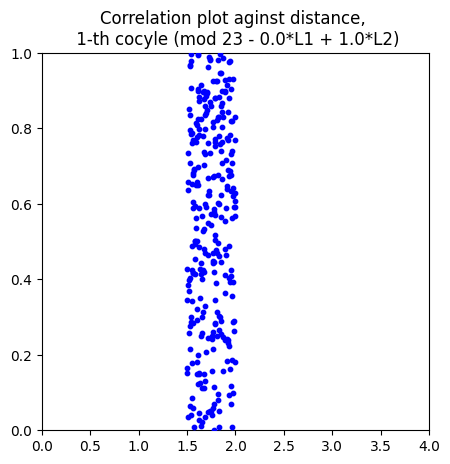

>>>>>> End Time (GCC computation): 2021-06-12 13:54:36


In [1]:
from GCC2_fun import GCC2
import numpy as np
#dataset=np.random.normal(0,2,(100,2))
#for i in range(dataset.shape[0]):
#    #print(i)
#    if np.abs(dataset[i,0])<1 and np.abs(dataset[i,1])<1:
#        dataset[i,0] = 0
#        dataset[i,1] = 0
dataFile='Example1_d=0.5.txt'
dataset=np.loadtxt(dataFile)

        
GCC_test=GCC2(dataset,threshold=-1,maxscale=4,CEthreshold=1e-5,lp=1,lq=2,Nsteps=100,lambda_coef=1,PLOT=True)
### usage: GCC2(dataset,threshold,maxscale,CEthreshold=1e-5,lp=1,lq=2,Nsteps=1000,lambda_coef=0.5)
###[dataset] The dataset you want to analyze using circular coordinates in numpy array. 
###The cols of the array are dimensions/variables; the rows of the array are samples.
###[threshold] The threhold on persistence which we use to select those significant cocyles from all cocycles constructed from the Vietoris-Rips complex built upon the data. 
###If negative integer M, the 1-cocycles with the 1,2,...,M-th largest persistence will be picked. This option would override the threshold option. 
###[CEthreshold] The threshold that we use to determine the constant edges. When the coordinate functions' values changed below this threshold, we consider it as a constant edge and plot it.
###[maxscal] The maximal scale at which we shall construct the Vietoris-Rips complex for circular coordinate computation.
###[lp] [lq] The generalized penalty function is in form of (1-lambda_parameter)*L^[lp]+lambda_parameter*L^[lq].
###[Nsteps] How many iterations you want to run in the tensorflow optimizer to obtain our circular coordinates? If negative number, no optimization would be executed.
###[lambda] This is a float parameter, if supplied, then only that lambda in the genealized coordinate would be calculated. 

In [2]:
#Now let's compute the functional norm of the circular coordinates corresponding to the 1-cocycle with the largest persistence.
L1_norm = []
L2_norm = []
Linf_norm = []
for j in range(len(GCC_test)):
    coords = GCC_test[j]
    coords_L1_norm = np.sum( np.abs(coords) )
    coords_L2_norm = np.sum( np.power(coords,2) )
    coords_Linf_norm = np.max( np.abs(coords) )
    
    L1_norm.append(coords_L1_norm)
    L2_norm.append(coords_L2_norm)
    Linf_norm.append(coords_Linf_norm)
    
print(L1_norm,L2_norm,Linf_norm)

[161.99991703114338] [111.89005011276392] [0.998063526972235]


In [3]:
#Now let's compute the functional norm of the resulting circular coordinates computed under certain penalty functions.
L1_norm = []
L2_norm = []
Linf_norm = []
lambda_coef_list = [1e-5,1e-4,1e-3,1e-2,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1.0]
for lc in lambda_coef_list:
    GCC_test=GCC2(dataset,threshold=-1,maxscale=4,CEthreshold=1e-5,lp=1,lq=2,Nsteps=100,lambda_coef=lc,PLOT=False)
    for j in range(len(GCC_test)):
        coords = GCC_test[j]
        coords_L1_norm = np.sum( np.abs(coords) )
        coords_L2_norm = np.sum( np.power(coords,2) )
        coords_Linf_norm = np.max( np.abs(coords) )

        L1_norm.append(coords_L1_norm)
        L2_norm.append(coords_L2_norm)
        Linf_norm.append(coords_Linf_norm)
    
print(lambda_coef_list,L1_norm,L2_norm,Linf_norm)

Number of arguments: 9 arguments.
Argument List: ['GCC2_fun.GCC2' 'dataset' '-1' '4' '1e-05' '1' '2' '100' '1e-05'] 

Data file: dataset
Output file: dataset_output.pdf 

>>>>>>Start Time(VR computation): 2021-06-12 13:54:39
Base coefficient field: Z/23Z
Maximal scale: 4.0
Persistence threshold for selecting significant cocyles: -1.0
>>>>>>End Time (VR-computation): 2021-06-12 13:55:31

>>>>>>Threshold overridden, the 1-cocyles with the  1  largest persistence would be selected for computation.
>>>>>>Selected significant features:
(0.227016,2.66595) 	persistence =  2.438936099410057

Constant edges, with coordinates difference < 1e-05
Optimizer maximal iteration steps= 100
>>>>>> Start Time (GCC computation): 2021-06-12 13:55:31
>>>>>> lambda =  1e-05 . => Analysis of Circular coordinates 
 (mod 23 - 0.99999*L1 + 1e-05*L2)
Penalty function =>0.99999*L^1+1e-05*L^2
Before optim cost: 3487.2436309212494
After  optim cost: 3467.6680585747226  in  100  steps
Penalty function =>0.99999*L^1+1

Number of arguments: 9 arguments.
Argument List: ['GCC2_fun.GCC2' 'dataset' '-1' '4' '1e-05' '1' '2' '100' '0.5'] 

Data file: dataset
Output file: dataset_output.pdf 

>>>>>>Start Time(VR computation): 2021-06-12 14:04:52
Base coefficient field: Z/23Z
Maximal scale: 4.0
Persistence threshold for selecting significant cocyles: -1.0
>>>>>>End Time (VR-computation): 2021-06-12 14:06:01

>>>>>>Threshold overridden, the 1-cocyles with the  1  largest persistence would be selected for computation.
>>>>>>Selected significant features:
(0.227016,2.66595) 	persistence =  2.438936099410057

Constant edges, with coordinates difference < 1e-05
Optimizer maximal iteration steps= 100
>>>>>> Start Time (GCC computation): 2021-06-12 14:06:01
>>>>>> lambda =  0.5 . => Analysis of Circular coordinates 
 (mod 23 - 0.5*L1 + 0.5*L2)
Penalty function =>0.5*L^1+0.5*L^2
Before optim cost: 1756.4590561386483
After  optim cost: 1746.7108070331028  in  100  steps
Penalty function =>0.5*L^1+0.5*L^2 Coordinates=>

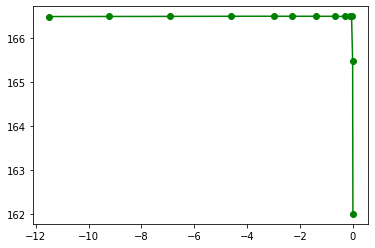

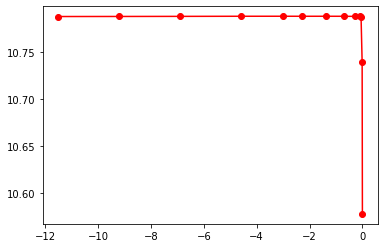

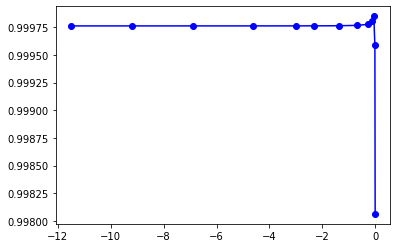

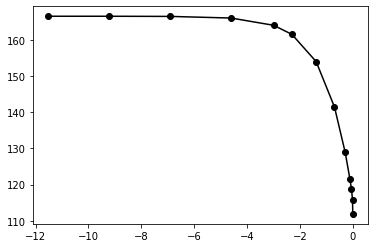

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.log(np.asarray(lambda_coef_list)),np.asarray(L1_norm),'go-',label='L1')
plt.figure()
plt.plot(np.log(np.asarray(lambda_coef_list)),np.sqrt(np.asarray(L2_norm)),'ro-',label='L2')
plt.figure()
plt.plot(np.log(np.asarray(lambda_coef_list)),np.asarray(Linf_norm),'bo-',label='Linf')
plt.figure()
mix_norm = np.asarray(L1_norm)*(1-np.asarray(lambda_coef_list))+np.asarray(L2_norm)*np.asarray(lambda_coef_list)
plt.plot(np.log(np.asarray(lambda_coef_list)),mix_norm,'ko-',label='Lmix')
#plt.legend()

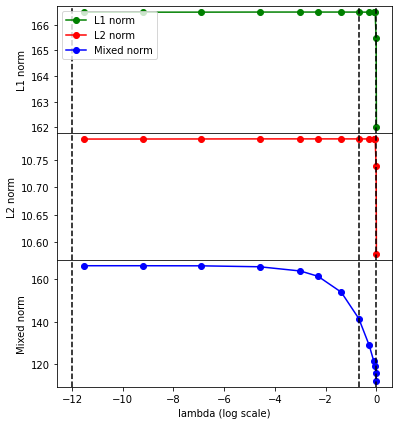

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

fig = plt.figure(figsize=(6,7))
# set height ratios for subplots
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1,1]) 

# the first subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
# ax0.set_yscale("log")
line0, = ax0.plot(np.log(np.asarray(lambda_coef_list)),np.asarray(L1_norm),'go-',label='L1')
ax0.axvline(x=-12,ls='--',c='k')
ax0.axvline(x=np.log(0.5),ls='--',c='k')
ax0.axvline(x=-0,ls='--',c='k')
ax0.set_xlabel('lambda (log scale)')
ax0.set_ylabel('L1 norm')

# the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
line1, = ax1.plot(np.log(np.asarray(lambda_coef_list)),np.sqrt(np.asarray(L2_norm)),'ro-',label='L2')
ax1.axvline(x=-12,ls='--',c='k')
ax1.axvline(x=np.log(0.5),ls='--',c='k')
ax1.axvline(x=-0,ls='--',c='k')
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
#yticks = ax1.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)
ax1.set_xlabel('lambda (log scale)')
ax1.set_ylabel('L2 norm')

# the thrid subplot
# shared axis X
ax2 = plt.subplot(gs[2], sharex = ax0)
line2, = ax2.plot(np.log(np.asarray(lambda_coef_list)),mix_norm,'bo-',label='Lmix')
ax2.axvline(x=-12,ls='--',c='k')
ax2.axvline(x=np.log(0.5),ls='--',c='k')
ax2.axvline(x=-0,ls='--',c='k')
plt.setp(ax1.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
yticks[-1].label2.set_visible(False)
ax2.set_xlabel('lambda (log scale)')
ax2.set_ylabel('Mixed norm')
# put legend on first subplot
ax0.legend((line0, line1,line2), ('L1 norm', 'L2 norm','Mixed norm'), loc='upper left')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#fig = plt.gcf()
plt.show()
#dataFile='test.txt'
fig.savefig(dataFile+'.png')
